# Exercise 1
## Céline Budding && Dorothea Müller

# Configurations

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.signal import gaussian

%matplotlib inline

# 1. Frequency Content of Natural Images and Fourier Transform

## 1.

In [24]:
# (i) Random vector.
n = 500
v = np.random.random(n)

In [25]:
# (ii) Fourier transform.
v_fourier = np.fft.fft(v)

In [34]:
# (iii) Creating filter.
spatial_freq = np.fft.fftfreq(n)

In [38]:
def power_spectral_density(k, eps):
    # TODO: remove abs(k)?
    return 1/(eps + np.abs(k)**2)

In [48]:
all_eps = [0.001, 0.01, 0.1, 0.5, 1]

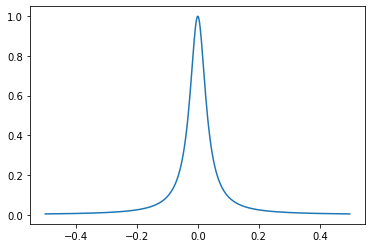

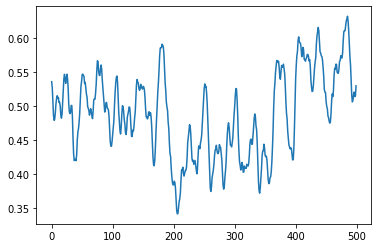

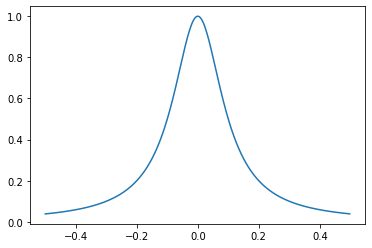

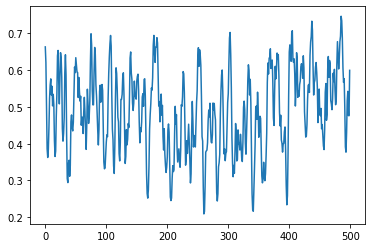

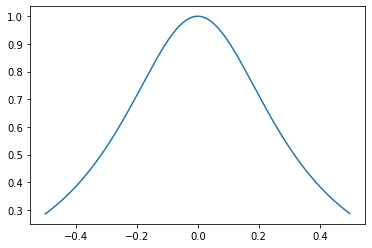

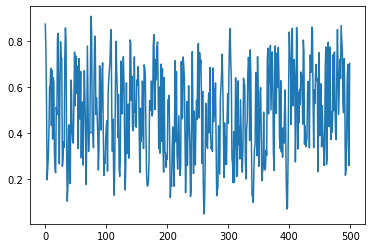

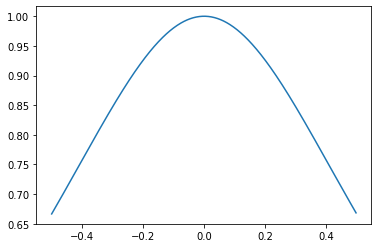

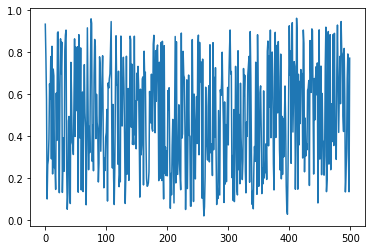

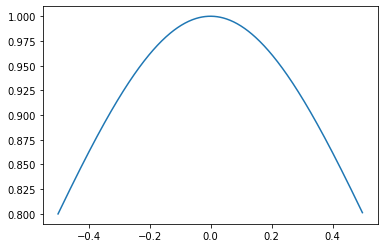

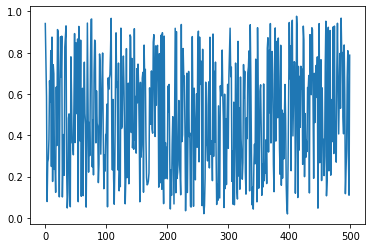

In [51]:
for eps in all_eps:
    filter_ = power_spectral_density(spatial_freq, eps) * eps
    filtered_v = filter_ * v_fourier
    # (iv) Inverse Fourier transform.
    v = np.fft.ifft(filtered_v)
    
    psd_x = np.fft.fftshift(spatial_freq)
    psd_y = np.fft.fftshift(filter_)
    plt.plot(psd_x, psd_y)
    plt.show()
    plt.plot(v)
    plt.show()

## What is the effect of e?

The filter is a low-pass filter as higher frequencies get filtered out. The lower e is, the more gets filtered out.

## 2.

In [56]:
img = np.random.random((n, n))
img_fourier = np.fft.fft2(img)

In [58]:
spatial_freq_x = np.fft.fftfreq(n)
spatial_freq_y = np.fft.fftfreq(n)
xx, yy = np.meshgrid(spatial_freq_x, spatial_freq_y)

In [59]:
def power_spectral_density_2d(xx, yy, eps):
    # TODO: remove np.sqrt and **2?
    return 1/(eps + np.sqrt(xx**2 + yy**2)**2)

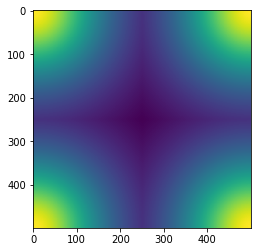

In [64]:
plt.imshow(power_spectral_density_2d(xx,yy, 0.1))

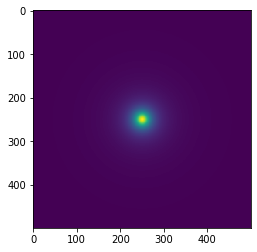

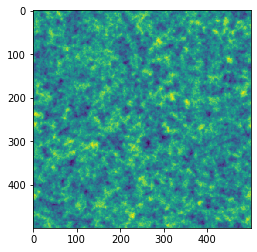

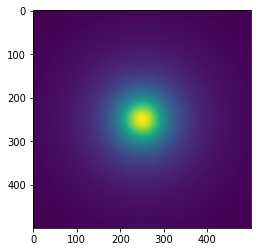

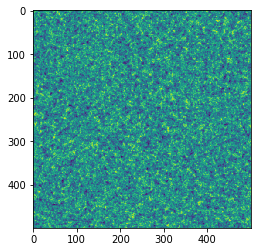

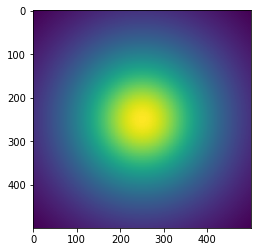

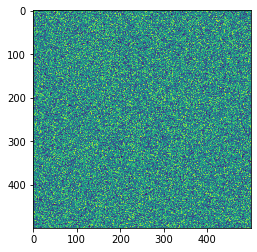

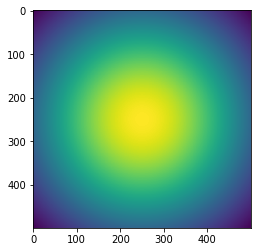

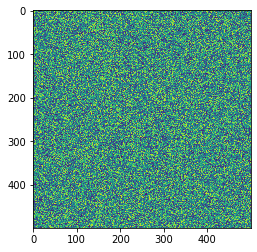

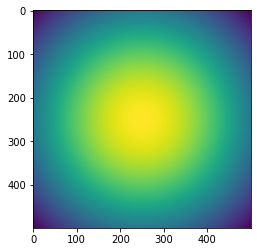

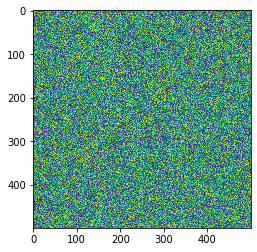

In [75]:
for eps in all_eps:
    filter_ = power_spectral_density_2d(xx,yy, eps) * eps
    filtered_img = filter_ * img_fourier
    img = np.fft.ifft2(filtered_img)#.astype(float)
    
#     psd_x = np.fft.fftshift(spatial_freq)
    psd = np.fft.fftshift(filter_)
    plt.imshow(psd)
    plt.show()
    plt.imshow(img.real)
    plt.show()

The created images do not look natural because the structure is random, there is no order in the images. Adjacent pixels are usually correlated. Therefore, to create natural looking images, we should enforce some structure on the output. 

## 3.

(330, 250)


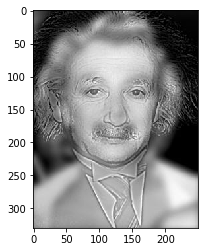

In [139]:
path = './hybrid.png'
img = imread(path)
print(img.shape)
plt.imshow(img, cmap = 'gray');

In [140]:
all_sigmas = [1, 5, 10, 25, 50, 100]

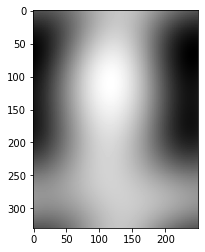

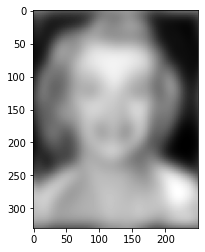

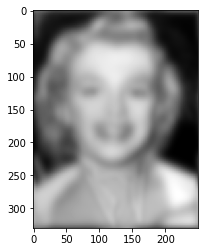

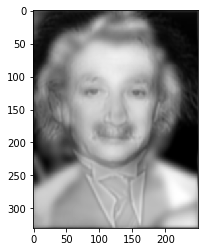

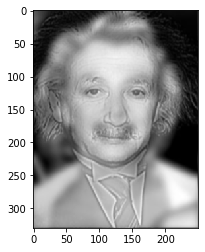

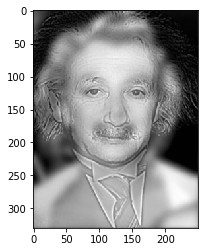

In [142]:
for sigma in all_sigmas:
    gauss_dim1 = gaussian(img.shape[0], sigma)
    gauss_dim2 = gaussian(img.shape[1], sigma)
    gauss_filter = np.outer(gauss_dim1, gauss_dim2)
    gauss_filter = np.fft.fftshift(gauss_filter)
    
    img_fourier = np.fft.fft2(img)
    img_filtered = gauss_filter * img_fourier
    img_final = np.fft.ifft2(img_filtered)

    plt.imshow(img_final.real, cmap = 'gray')
    plt.show()

In [132]:
gauss_dim1 = gaussian(img.shape[0], 50)
gauss_dim2 = gaussian(img.shape[1], 50)
gauss_filter = np.outer(gauss_dim1, gauss_dim2)
gauss_filter = np.fft.fftshift(gauss_filter)
gauss_filter.shape

(330, 250)

(330, 250)
(330, 250)
(330, 250)
<class 'numpy.ndarray'>


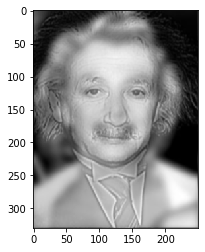

In [133]:
img_fourier = np.fft.fft2(img)
print(img_fourier.shape)
# import scipy
# from scipy.signal import convolve2d
img_filtered = gauss_filter * img_fourier
print(img_filtered.shape)
img = np.fft.ifft2(img_filtered)
print(img.shape)
print(type(img))
plt.imshow(img.real, cmap = 'gray');

# 2. "Natural Input" for the Cell in the Early Visual System

### 1.

(1000, 1000)

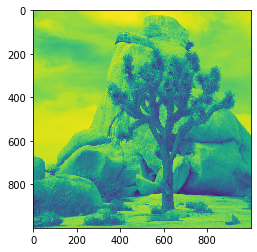

In [8]:
path = "./natural/natural1.png"

img = imread(path)
plt.imshow(img)
img.shape

### 2.

In [9]:
def extract_patch(img, l_x, l_y, x, y):
    """Extract patches from the img from position x, y with length l_x and l_y, respectively."""
    x_half = l_x//2
    y_half = l_y//2
    
    # Cave. Assuming x should be the horizontal direction and y the vertical,
    # the accesses has to be img[y, x].
    return img[y-y_half:y+y_half, x-x_half:x+x_half]

In [10]:
def x_in_border(img, x, x_half):
    return x + x_half < img.shape[1] and x - x_half > 0

def y_in_border(img, y, y_half):
    return y + y_half < img.shape[0] and y - y_half > 0

In [11]:
def extract_patch(img, l_x, l_y, x, y):
    """Extract patches from the img from position x, y with length l_x and l_y, respectively."""
    x_half = l_x//2
    y_half = l_y//2
    
    print(x_in_border(img, x, x_half))
    print(y_in_border(img, y, y_half))
    
    if not x_in_border(img, x, x_half):
        return None
    if not y_in_border(img, y, y_half):
        return None
    
    # Cave. Assuming x should be the horizontal direction and y the vertical,
    # the accesses has to be img[y, x].
    return img[y-y_half:y+y_half, x-x_half:x+x_half]

True
True
(100, 10)


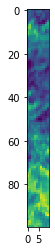

False
True


In [12]:
extracted = extract_patch(img, 10, 100, 400, 850)
print(extracted.shape)
plt.imshow(extracted)
plt.show()

extracted = extract_patch(extracted, 4, 0, 100, 50)

True
True
(200, 200)


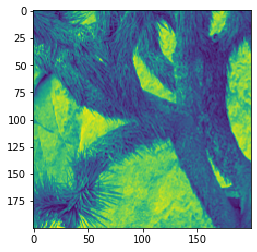

True
True
(100, 10)


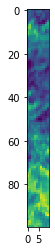

False
True


In [13]:
# Testing
extracted = extract_patch(img, 200, 200, 500, 500)
print(extracted.shape)
plt.imshow(extracted)
plt.show()

extracted = extract_patch(img, 10, 100, 400, 850)
print(extracted.shape)
plt.imshow(extracted)
plt.show()

extracted = extract_patch(img, 100, 100, 50000, 500)
assert extracted is None

### 3. Micro-Saccades

In [14]:
l_x = 25
l_y = 25
n_saccades = 10

In [15]:
# position = (500, 500) # TODO: random
# sequence_positions = []
# plt.subplots(2, 5)

# for i in range(n_saccades):
#     # New positions.
#     x, y = position
#     ch_x, ch_y = np.random.normal(0, 4, 2)
#     x+= int(ch_x) # Cast to pixels.
#     y+= int(ch_y)
#     sequence_positions.append((x, y))
    
#     # Extract image.
#     extr_img = extract_patch(img, l_x, l_y, x, y)
#     plt.subplots(211)
#     plt.imshow(extr_img)
#     plt.show()
#     print(ch_x, ch_y)
#     # TODO: return none if sampled point not within pictures

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


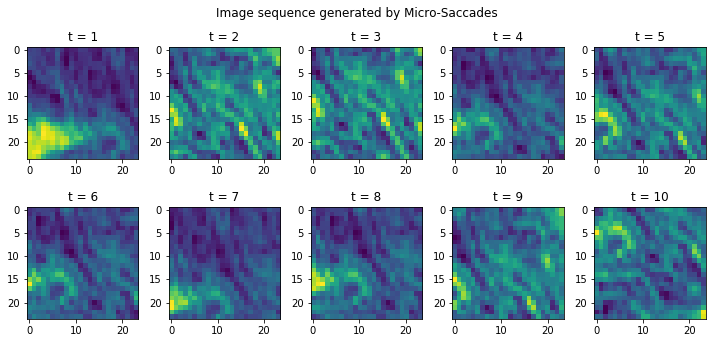

In [16]:
position = (500, 500) # TODO: random
sequence_positions = []
fig, axs = plt.subplots(2, 5, figsize = (10, 5))

for i, ax in enumerate(axs.flat):
    # New positions.
    x, y = position
    ch_x, ch_y = np.random.normal(0, 4, 2)
    x+= int(ch_x) # Cast to pixels.
    y+= int(ch_y)
    sequence_positions.append((x, y))
    
    # Extract image.
    extr_img = extract_patch(img, l_x, l_y, x, y)
    ax.imshow(extr_img)
    ax.set_title(f"t = {i + 1}")
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')

plt.suptitle("Image sequence generated by Micro-Saccades")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [17]:
# Sequence was used with by generating following jumps:
sequence_positions

[(487, 496),
 (506, 501),
 (506, 503),
 (498, 498),
 (503, 499),
 (498, 499),
 (495, 495),
 (496, 499),
 (505, 498),
 (500, 509)]

### 4. Saccades

In [18]:
## TODO. Also make extract image check whether arrayoutofboundaries condition is made (then return None, sample as long as it is None).

### 5. Comparison Micro-Saccades and Saccades

Observation

### 6. Different Natural Image.

In [19]:
## TODO: make the above as functions.